In [1]:
from sinupy.algebra.dispersion import deduction_dispersion_in_plasma as de

from sympy import init_printing; init_printing()
from sympy import pi

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # display series expression in one cell

## Wave Equation
The tensor coefficient matrix in electromagnetic wave equation 

$$\mathit{k}\times(\mathit{k}\times \tilde{\mathit{E}}) + k_0^2 \mathbf{\kappa}\cdot \tilde{\mathit{E}}=\mathit{0}$$

$$
\left(\begin{bmatrix}
-k_z^2 &  & k_x k_z \\ 
 & -k_x^2-k_z^2 & \\ 
 k_x k_z &  & -k_x^2
\end{bmatrix} + k_0^2
\begin{bmatrix}
\kappa_\perp & -j \kappa_\times & \\ 
j\kappa_\times & \kappa_\perp  & \\ 
 &  & \kappa_\parallel
\end{bmatrix}\right)\cdot 
\begin{bmatrix}
\tilde{E}_x\\ 
\tilde{E}_y\\ 
\tilde{E}_z
\end{bmatrix} = 
\begin{bmatrix}
0\\ 
0\\ 
0
\end{bmatrix}$$

$$
\mathbf{T}\cdot 
\begin{bmatrix}
\tilde{E}_x\\ 
\tilde{E}_y\\ 
\tilde{E}_z
\end{bmatrix} = 
\begin{bmatrix}
0\\ 
0\\ 
0
\end{bmatrix}
$$

You can acquire the *sympy.Array* representation of the above (tensor) matrix coefficients by the following tensor_in_wave_equation() method of the class *deduction_disperion_in_plasma*. For the relevant variable, you can get them by *deduction_disperion_in_plasma.variable_name*, *e.g.*, deduction_disperion_in_plasma.k_x.

In [2]:
de.tensor_in_wave_equation()

/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: Matpl

⎡    2              2      2                           2                      
⎢  k₀ ⋅κ_\perp - k_y  - k_z      - ⅈ⋅\kappa_{\times}⋅k₀  + kₓ⋅k_y             
⎢                                                                             
⎢                    2                 2             2      2                 
⎢ⅈ⋅\kappa_{\times}⋅k₀  + kₓ⋅k_y      k₀ ⋅κ_\perp - kₓ  - k_z                 k
⎢                                                                             
⎢                                                                    2        
⎣            kₓ⋅k_z                          k_y⋅k_z               k₀ ⋅κ_\para

                 ⎤
kₓ⋅k_z           ⎥
                 ⎥
                 ⎥
_y⋅k_z           ⎥
                 ⎥
         2      2⎥
llel - kₓ  - k_y ⎦

The solve procedure, *i.e.* $\text{det}(\mathbf{T})=0$, requires several seconds to complete, so it is set to be run only once and cache the result to prevent repeated solving request. Users would observe a enormous speedup at the second run of *solve_N2_with_theta_and_kappa_component()* method.

The function returns the solutions of $N^2(\omega, \theta)$.

In [3]:
%%timeit -n1 # run onces (1 loop each run) in each run
de.solve_N2_with_theta_and_kappa_component()

The slowest run took 4182974.12 times longer than the fastest. This could mean that an intermediate result is being cached.
1.04 s ± 2.56 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%%timeit
de.solve_N2_with_theta_and_kappa_component()

307 ns ± 4.54 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


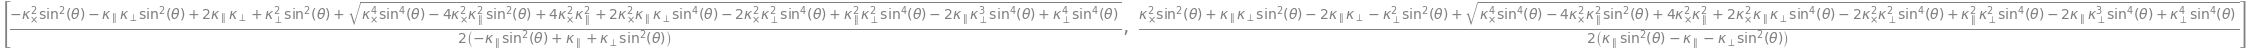

In [5]:
de.solve_N2_with_theta_and_kappa_component()

## R,L / X,O Waves

For specific $\theta$, you can observe the evident R,L / X,O waves


In [6]:
# Wave propagate along the magnetic field, thus comes  L / R waves.
de.solve_N2_with_specific_theta_and_kappa_component(0)
# Wave propagate perpendicular to the magnetic field, thus comes O / X waves.
de.solve_N2_with_specific_theta_and_kappa_component(pi/2)

## Draw Dispersion Relation


In [7]:
from scipy.constants import c
from sympy import sqrt, pi
import numpy as np
import matplotlib.pyplot as plt
import sinupy.algebra.utility as fualguti
import sinupy.algebra.parameter as fupm
from sinupy.algebra.draw import draw_discontinuable_expr, add_line_with_slope

### $N^2(\omega, \theta=0)$ and $\omega$ Singularies 
Express $N^2$ with $\omega$, $\omega_{ce}$, $\omega_{pe}$, rather than $\kappa_\perp$, $\kappa_\times$, $\kappa_\parallel$.

There exist omega $\omega$ singularites. At these points, $\omega$ would cause an infinite $N^2$, *i.e.* induce resonance. 

The number of numerical result may be less than analytic symbol results, because sympy knows $\omega \geq 0$ and removes some obviously wrong answers.

/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: Matpl

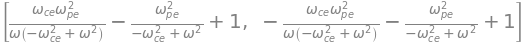

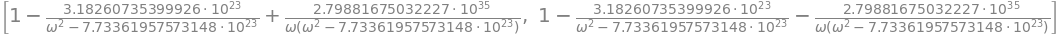

In [8]:
# Substitute kappa components with omega.
N2_with_omega = [
    de.subs_kappa_with_omega(sol) for sol in 
    de.solve_N2_with_specific_theta_and_kappa_component(0)] # <-- Set theta here
N2_with_omega

# Symbol results of omega singularities
[fualguti.find_singularities(sol, de.omega) for sol in N2_with_omega]

# Substitute constant parameters with accurate numerical values.
B, n_0 = 5, 1e20
N2_with_omega_univar = [
    sol\
    .subs(de.omega_ce, fupm.omega_ce(B=B)[0])\
    .subs(de.omega_pe, fupm.omega_pe(n_0=n_0, B=B)[0]) for sol in N2_with_omega]
N2_with_omega_univar

# Numerical result of omega singularities
omega_singularites = \
    [fualguti.find_singularities(sol, de.omega) for sol in N2_with_omega_univar]
omega_singularites 

In [9]:
InteractiveShell.ast_node_interactivity = 'last_expr' # do not print too much trash

<string>:2: RuntimeWarning: invalid value encountered in sqrt
<string>:2: RuntimeWarning: invalid value encountered in sqrt
<string>:2: RuntimeWarning: invalid value encountered in sqrt
<string>:2: RuntimeWarning: invalid value encountered in sqrt


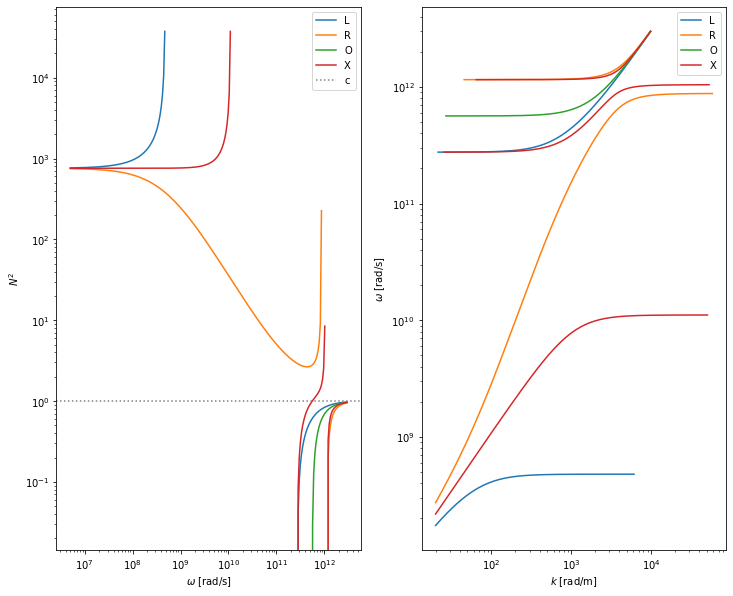

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(12, 10))

ax = axs[0]
ax.set_xscale('log'); ax.set_yscale('log')
ax.set_xlabel('$\omega$ [rad/s]') 
ax.set_ylabel('$N^2$') 
ax.tick_params(axis='x', which='minor', bottom=True, labelbottom=True)

ax = axs[1]
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$k$ [rad/m]') 
ax.set_ylabel('$\omega$ [rad/s]') 
ax.tick_params(axis='x', which='minor', bottom=True, labelbottom=True)
ax.tick_params(axis='y', which='minor', left=True, labelleft=True)

for theta in [0, pi/2]:
    # Substitute kappa components with omega.
    N2_with_omega = [
        de.subs_kappa_with_omega(sol, 'electron+ion') for sol in 
        de.solve_N2_with_specific_theta_and_kappa_component(theta)] # <-- Set theta here

    # Substitute constant parameters with accurate numerical values.
    B, n_0 = 5, 1e20
    N2_with_omega_univar = [
        sol\
        .subs(de.omega_ce, fupm.omega_ce(B=B)[0])\
        .subs(de.omega_pe, fupm.omega_pe(n_0=n_0, B=B)[0])\
        .subs(de.omega_ci, fupm.omega_cp(B=B)[0])\
        .subs(de.omega_pi, fupm.omega_pp(n_0=n_0, B=B)[0]) for sol in N2_with_omega]
    
    if theta == 0: 
#         draw_kwarg['labels'] = [{'label': 'L'}, {'label': 'R'}] # ['L', 'R']
        subkwarg = [{'label': 'L'}, {'label': 'R'}] # ['L', 'R']
    elif theta == pi/2:
#         draw_kwarg['labels'] = ['O', 'X']
        subkwarg = [{'label': 'O'}, {'label': 'X'}] # ['L', 'R']
    else:
        subkwarg = None
        
    ax = axs[0]
    draw_discontinuable_expr(
        N2_with_omega_univar, de.omega, 
        varlim=(0.5e7, 3e12), # limit of wave angular frequency, omega
        exprlim=(-0.4, 1e5), # limit of N^2, refraction index
        num=250,
        var_sample_scale='log', fig=fig, ax=ax, list_subkwarg=subkwarg)
    
    ax = axs[1]
    k_with_omega = [de.omega / c * sqrt(sol) for sol in N2_with_omega_univar]
    draw_discontinuable_expr(
        k_with_omega, de.omega, 
        varlim=(0.5e7, 3e12), # limit of wave angular frequency, omega, rad/s
        exprlim=(2e1, 6e4),        # limit of wave vector length, k, rad/m
        num=int(1e5), var_is_yaxis=True,
        var_sample_scale='log', fig=fig, ax=ax, list_subkwarg=subkwarg)
    
axs[0].axhline(y=0, color='lightgrey', linestyle=':')       # N^2 = 1
axs[0].axhline(y=1, color='grey', linestyle=':', label='c') # N^2 = 0
# Add a line corresponding to light in vacuum. 
# add_line_with_slope(axs[1], c, num=500, color='grey', linestyle='--', label='c')
[ax.legend() for ax in axs]

In [58]:
# Substitute kappa components with omega.
N2_with_theta_omega = [
    de.subs_kappa_with_omega(sol, 'electron+ion') for sol in 
    de.solve_N2_with_theta_and_kappa_component()] # <-- Set theta here

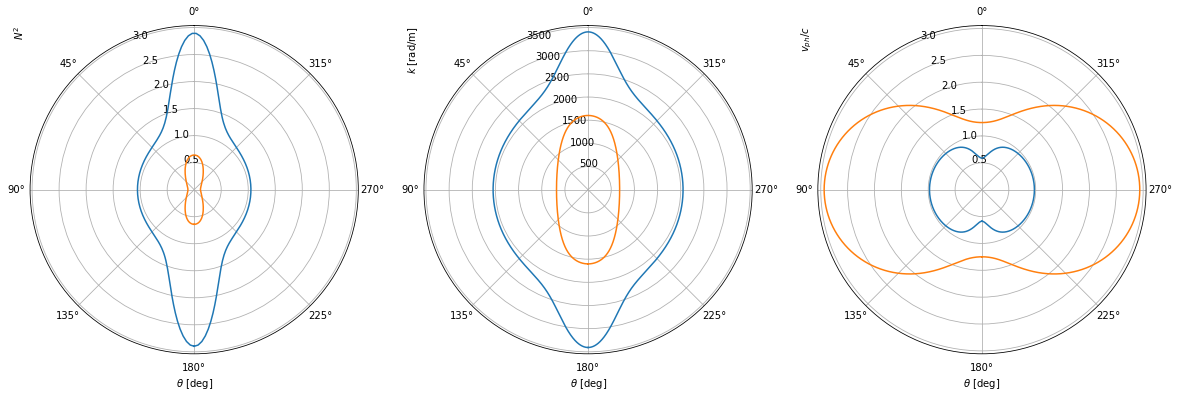

In [59]:
fig, axs = plt.subplots(1, 3, figsize=(20, 12), subplot_kw={'projection': 'polar'})

for ax in axs:
    ax.set_xlabel('$\\theta$ [deg]') 
    ax.grid(True)
    ax.set_theta_zero_location('N')

axs[0].set_ylabel('$N^2$', loc='top') 
axs[1].set_ylabel('$k$ [rad/m]', loc='top') 
axs[2].set_ylabel('$v_{ph}/c$', loc='top') 

B, n_0 = 5, 1e20
for omega in [6e11]:
    from scipy.constants import pi

    # Substitute constant parameters with accurate numerical values.
    N2_with_theta_univar = [
        sol\
        .subs(de.omega, omega)
        .subs(de.omega_ce, fupm.omega_ce(B=B)[0])\
        .subs(de.omega_pe, fupm.omega_pe(n_0=n_0, B=B)[0])\
        .subs(de.omega_ci, fupm.omega_cp(B=B)[0])\
        .subs(de.omega_pi, fupm.omega_pp(n_0=n_0, B=B)[0]) for sol in N2_with_theta_omega]

    if theta == 0: 
#         draw_kwarg['labels'] = [{'label': 'L'}, {'label': 'R'}] # ['L', 'R']
        subkwarg = [{'label': 'L'}, {'label': 'R'}] # ['L', 'R']
    elif theta == pi/2:
#         draw_kwarg['labels'] = ['O', 'X']
        subkwarg = [{'label': 'O'}, {'label': 'X'}] # ['L', 'R']
    else:
        subkwarg = None
        
    ax = axs[0]
    draw_discontinuable_expr(
        N2_with_theta_univar, de.theta, 
        varlim=(-pi, pi), # limit of theta, from [0, pi]
        exprlim=(-0.4, 1e5), # limit of N^2, refraction index
        num=250,
        var_sample_scale='linear', fig=fig, ax=ax, list_subkwarg=subkwarg)
    
    ax = axs[1]
    k_with_theta = [omega / c * sqrt(sol) for sol in N2_with_theta_univar]
    draw_discontinuable_expr(
        k_with_theta, de.theta, 
        varlim=(-pi, pi), # limit of theta, from [0, pi]
#         exprlim=(0, 6e4), # limit of wave vector length, k, rad/m
        num=int(1e5), var_is_yaxis=False,
        var_sample_scale='linear', fig=fig, ax=ax, list_subkwarg=subkwarg)
    
    ax = axs[2]
    v_ph_ratio_c_with_theta = [1 / sqrt(sol) for sol in N2_with_theta_univar]
    draw_discontinuable_expr(
        v_ph_ratio_c_with_theta, de.theta, 
        varlim=(-pi, pi), # limit of theta, from [0, pi]
#         exprlim=(0, 6e4), # limit of v_ph, wave phase speed, m/s
        num=int(1e5), var_is_yaxis=False,
        var_sample_scale='linear', fig=fig, ax=ax, list_subkwarg=subkwarg)
    

# Add a line corresponding to light in vacuum. 
# add_line_with_slope(axs[1], c, num=500, color='grey', linestyle='--', label='c')
# [ax.legend() for ax in axs]

In [60]:
plasma_B_n_0_omega = [
    (1.5e0, 2e19, 8e11), (50, 2e19, 8e11), (5e2, 2e19, 8e11), (1.2e4, 2e19, 8e11),
    (1.5e0, 1e22, 8e11), (50, 1e22, 8e11), (5e2, 1e22, 8e11), (1.2e4, 1e22, 8e11),
                                           (5e2, 5e24, 8e11), (1.2e4, 5e24, 8e11)]

for i, (B, n_0, omega) in enumerate(plasma_B_n_0_omega):
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': 'polar'})
    xy = ((fupm.omega_pe(n_0, B)[0]**2 + fupm.omega_pp(n_0,B)[0]**2) / omega**2,
         fupm.omega_ce(B)[0] * fupm.omega_cp(B)[0] / omega**2)
    print(xy)
    ax.set_xlabel('$\\theta$ [deg]') 
    ax.set_ylabel('$v_{ph}/c$', loc='top') 
    ax.grid(True)
    ax.set_theta_zero_location('N')
    
    # Substitute constant parameters with accurate numerical values.
    N2_with_theta_univar = [
        sol\
        .subs(de.omega, omega)
        .subs(de.omega_ce, fupm.omega_ce(B=B)[0])\
        .subs(de.omega_pe, fupm.omega_pe(n_0=n_0, B=B)[0])\
        .subs(de.omega_ci, fupm.omega_cp(B=B)[0])\
        .subs(de.omega_pi, fupm.omega_pp(n_0=n_0, B=B)[0]) for sol in N2_with_theta_omega]

    ax = ax
    v_ph_ratio_c_with_theta = [1 / sqrt(sol) for sol in N2_with_theta_univar]
    from scipy.constants import pi
    draw_discontinuable_expr(
        v_ph_ratio_c_with_theta, de.theta, 
        varlim=(-pi, pi), # limit of theta, from [0, pi]
        num=int(1e5), var_is_yaxis=False,
        var_sample_scale='linear', fig=fig, ax=ax)
#     fig.savefig('data' / 'algebra' / 'dispersion' / f'CMA_{i}.png', bbox_inches='tight')
    plt.close(fig)

(0.0995106455042796, 5.922929332448978e-05)
(0.0995106455042796, 0.06581032591609977)
(0.0995106455042796, 6.581032591609977)
(0.0995106455042796, 3790.6747727673464)
(49.7553227521398, 5.922929332448978e-05)


<string>:2: RuntimeWarning: invalid value encountered in sqrt
<string>:2: RuntimeWarning: invalid value encountered in sqrt


(49.7553227521398, 0.06581032591609977)


<string>:2: RuntimeWarning: invalid value encountered in sqrt
<string>:2: RuntimeWarning: invalid value encountered in sqrt


(49.7553227521398, 6.581032591609977)


<string>:2: RuntimeWarning: invalid value encountered in sqrt


(49.7553227521398, 3790.6747727673464)


<string>:2: RuntimeWarning: invalid value encountered in sqrt


(24877.6613760699, 6.581032591609977)


<string>:2: RuntimeWarning: invalid value encountered in sqrt


(24877.6613760699, 3790.6747727673464)


<string>:2: RuntimeWarning: invalid value encountered in sqrt


In [61]:
import sinupy.algebra.dispersion
from importlib import reload
reload(sinupy.algebra.dispersion)
from sinupy.algebra.dispersion import deduction_dispersion_in_plasma as de

In [62]:
from sympy import symbols, solve, Eq, sqrt
from sinupy.algebra.draw import draw_discontinuable_expr, add_line_with_slope
m_i, m_e, X, Y = symbols("m_i, m_e, X, Y", positive=True)

In [63]:
# Substitute kappa components with omega.
from sympy import pi
N2_with_omega = [
    de.subs_kappa_with_omega(sol, 'electron') for sol in 
    de.solve_N2_with_specific_theta_and_kappa_component(pi/2)] # <-- Set theta here
N2_with_omega
# Symbol results of omega singularities
resonance_omega_points = [fualguti.find_singularities(sol, de.omega) for sol in N2_with_omega]
resonance_omega_square_points = [
    list(set(map(lambda x:pow(x,2), branch_omega_points))) for branch_omega_points in resonance_omega_points]
resonance_omega_square_points

/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/home/wenyin/pyvenv/vsym/lib/python3.7/site-packages/IPython/lib/latextools.py:126: Matpl

In [64]:
from sympy import symbols
e, m_e, m_i, epsilon = symbols('e, m_e, m_i, epsilon', positive=True)
epsilon

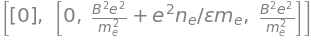

In [65]:
resonance_omega_square_points = [[
    omega_square\
        .subs(de.omega_ce, e*de.B / m_e)\
        .subs(de.omega_ci, e*de.B / m_i)\
        .subs(de.omega_pe**2, e**2 * de.n_e /(epsilon * m_e))\
        .subs(de.omega_pi**2, e**2 * de.n_e /(epsilon * m_i)) for omega_square in branch
] for branch in resonance_omega_square_points] 

resonance_omega_square_points

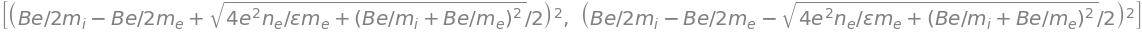

In [66]:
from sympy import sqrt
cutoff_omega_square_points = [
    omega_square\
        .subs(de.omega_ce, e*de.B / m_e)\
        .subs(de.omega_ci, e*de.B / m_i)\
        .subs(de.omega_pe**2, e**2 * de.n_e /(epsilon * m_e))\
        .subs(de.omega_pi**2, e**2 * de.n_e /(epsilon * m_i)) 
    for omega_square in 
    [((de.omega_ci-de.omega_ce + sqrt((de.omega_ce+de.omega_ci)**2 + 4 * de.omega_pe**2))/2)**2, 
     ((de.omega_ci-de.omega_ce - sqrt((de.omega_ce+de.omega_ci)**2 + 4 * de.omega_pe**2))/2)**2]
#     [((de.omega_ce + sqrt(de.omega_ce**2 + 4 * de.omega_pe**2))/2)**2, 
#      ((-de.omega_ce + sqrt(de.omega_ce**2 + 4 * de.omega_pe**2))/2)**2, ]
] 

cutoff_omega_square_points

In [67]:
X, Y = symbols('X, Y', real=True, negative=False)

In [68]:
resonance_omega_square_points = [[
    omega_square\
        .subs(de.B**2, Y * (m_e * m_i * de.omega**2) /(e**2))\
        .subs(de.n_e, X * (epsilon * m_e * de.omega**2) / e**2) for omega_square in branch
] for branch in resonance_omega_square_points] 

resonance_omega_square_points

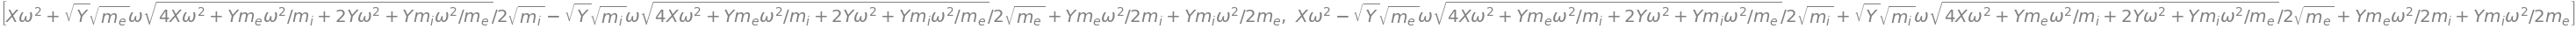

In [69]:
cutoff_omega_square_points = [
    omega_square\
        .expand()\
        .subs(de.B, sqrt(Y * (m_e * m_i)) * de.omega / e)\
        .subs(de.n_e, X * (epsilon * m_e * de.omega**2) / e**2) for omega_square in cutoff_omega_square_points
]

cutoff_omega_square_points

In [70]:
resonance_points_as_Eq_1 = [
    [
        omega_square.subs(de.omega, 1)
     for omega_square in branch
] for branch in resonance_omega_square_points]
resonance_points_as_Eq_1

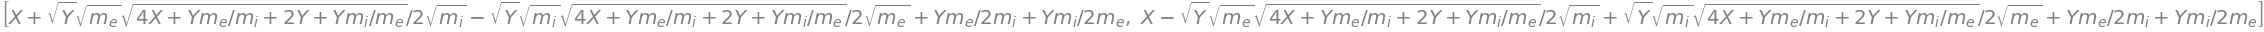

In [71]:
cutoff_points_as_Eq_1 = [
    omega_square.subs(de.omega, 1) for omega_square in cutoff_omega_square_points]
cutoff_points_as_Eq_1

In [72]:
from sympy import solve, Eq
solve(Eq(resonance_points_as_Eq_1[1][0], 1), Y)
solve(Eq(resonance_points_as_Eq_1[1][1], 1), Y)
solve(Eq(resonance_points_as_Eq_1[1][2], 1), Y)
solve(Eq(resonance_points_as_Eq_1[1][3], 1), Y)


IndexError: list index out of range

In [ ]:
solve(Eq(cutoff_points_as_Eq_1[0], 1), X)
solve(Eq(cutoff_points_as_Eq_1[1], 1), X)

In [ ]:
import matplotlib.pyplot as plt
fig_CMA, ax_CMA = plt.subplots(figsize=(20, 30))
ax_CMA.set_xscale('log')
ax_CMA.set_yscale('log')
ax_CMA.set_xlabel('$\omega_p^2/\omega^2$', loc='right', fontdict={'size': 32}) 
ax_CMA.set_ylabel('$\\frac{\omega_{ce}\omega_{ci}}{\omega^2}$ ', loc='top', fontdict={'size': 32}, rotation=0) 
# ax_CMA.set_xticks([1.0])
# ax_CMA.set_xticklabels(size=20)
ax_CMA.set_yticks([1./fupm.mass_proton()[0], 1.0, fupm.mass_proton()[0]/1])
ax_CMA.set_yticklabels(['$m_e/m_i$', '$1.0$', '$m_i/m_e$'], size=20)
# change the fontsize 
ax_CMA.tick_params(axis='x', labelsize=20) 

ax_CMA.axhline(
    y=solve(Eq(resonance_points_as_Eq_1[1][0], 1), Y)[0]\
    .subs(m_i, fupm.mass_proton()[0])\
    .subs(m_e, fupm.mass_electron()[0]), 
    color='blue', linestyle=':', label='$u_L=0$, $\omega=\omega_{ce}$')
ax_CMA.axhline(
    y=solve(Eq(resonance_points_as_Eq_1[1][1], 1), Y)[0]\
    .subs(m_i, fupm.mass_proton()[0])\
    .subs(m_e, fupm.mass_electron()[0]), 
    color='purple', linestyle=':', label='$u_R=0$, $\omega=\omega_{ci}$')
ax_CMA.axvline(
    x=1,
    color='darkcyan', linestyle=':', label='$u_O=\infty$, $\omega=\omega_{pe}$')
draw_discontinuable_expr(
    [sol\
    .subs(m_i, fupm.mass_proton()[0])\
    .subs(m_e, fupm.mass_electron()[0])
     for sol in solve(Eq(resonance_points_as_Eq_1[1][2], 1), Y)], X,
    varlim = (1e-3, 1e7), exprlim=(1e-5, None), num=500,
    var_sample_scale='log', fig=fig_CMA, ax=ax_CMA, labels=['$u_X=0$, $\omega=\omega_{UH}$', '$u_X=0$, $\omega=\omega_{LH}$']
)
draw_discontinuable_expr(
    [sol\
    .subs(m_i, fupm.mass_proton()[0])\
    .subs(m_e, fupm.mass_electron()[0])
     for sol in solve(Eq(cutoff_points_as_Eq_1[0], 1), Y)], X,
    varlim = (1e-3, 1e7), exprlim=(1e-5, None), num=500,
    var_sample_scale='log', fig=fig_CMA, ax=ax_CMA, labels=['$u_R=\infty$, $\omega=\omega_{R}$', '$u_L=\infty$, $\omega=\omega_{L}$']
)

ax_CMA.legend(prop={'size': 20})
plt.close(fig_CMA)

In [ ]:
from matplotlib.patches import Circle
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data

for i, (B, n_0, omega) in enumerate(plasma_B_n_0_omega):

    with get_sample_data(p_sinupy / 'data' / 'algebra' / 'dispersion' / f"CMA_{i}.png") as file:
        arr_img = plt.imread(file, format='png')

    imagebox = OffsetImage(arr_img, zoom=0.28)
    imagebox.image.axes = ax_CMA
    imagebox
    xy = ((fupm.omega_pe(n_0, B)[0]**2 + fupm.omega_pp(n_0,B)[0]**2) / omega**2,
         fupm.omega_ce(B)[0] * fupm.omega_cp(B)[0] / omega**2)
    print(xy)
    ab = AnnotationBbox(imagebox, xy,
                        xybox=(150., -200.),
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0.5,
                        arrowprops=dict(
                            arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=90,rad=3")
                        )

    ax_CMA.add_artist(ab)
    print(f"The {i}-th phase speed polar plot.")
fig_CMA

In [ ]:
reload(fupm)

In [111]:
import sinupy.algebra.parameter
from importlib import reload
reload(sinupy.algebra.parameter)
from sinupy.algebra.draw import draw_discontinuable_expr

<module 'fusystem.algebra.draw' from '/home/wenyin/FusionFolder/fucore_extension/fusystem/fusystem/algebra/draw.py'>

## References:

- For better color impression, [matplotlib official color gallery](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) can ben refered.
